In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as scs
from scipy.stats import chi2_contingency 
from itertools import combinations
%matplotlib inline  

In [2]:
alpha=0.05/23

In [3]:
data = pd.read_csv('data/nyt1.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458441 entries, 0 to 458440
Data columns (total 5 columns):
Age            458441 non-null int64
Gender         458441 non-null int64
Impressions    458441 non-null int64
Clicks         458441 non-null int64
Signed_In      458441 non-null int64
dtypes: int64(5)
memory usage: 17.5 MB


In [5]:
data.head(2)

,Age,Gender,Impressions,Clicks,Signed_In
0,36,0,3,0,1
1,73,1,3,0,1


In [6]:
data=data[data['Impressions']!=0]

In [7]:
data['CTR']=data['Clicks'] / data['Impressions'].astype(float)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11a5aee10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11abf8210>]], dtype=object)

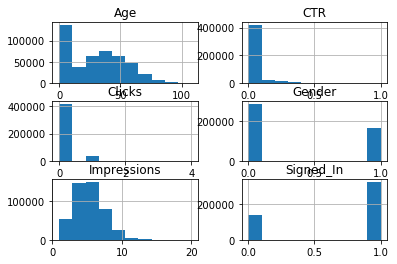

In [8]:
data.hist()

In [9]:
def plot_hist(df, title, color):
    df.hist(figsize=(12,5),  grid=False, normed=True,  color=color,  alpha=0.2)
    plt.suptitle(title, size=18, weight='bold', y=1.05) 


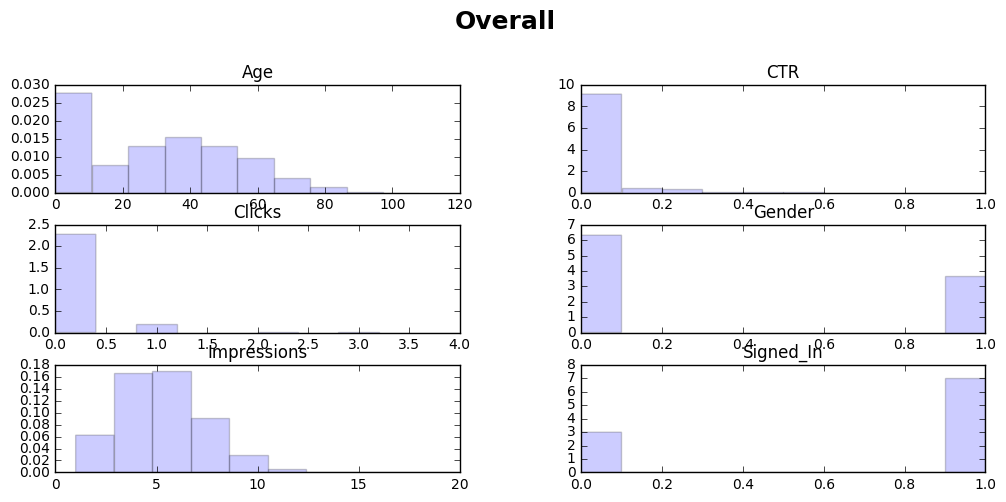

In [9]:
plot_hist(data, 'Overall', 'b')

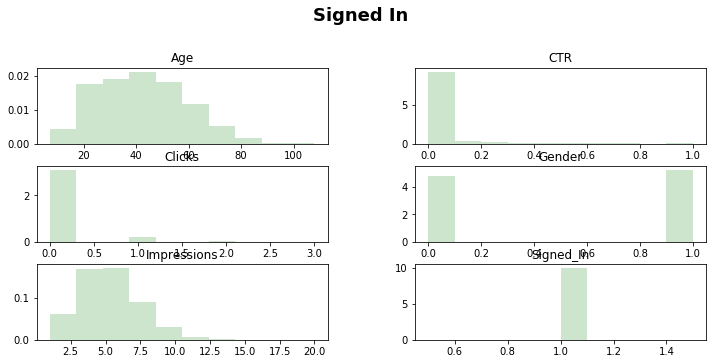

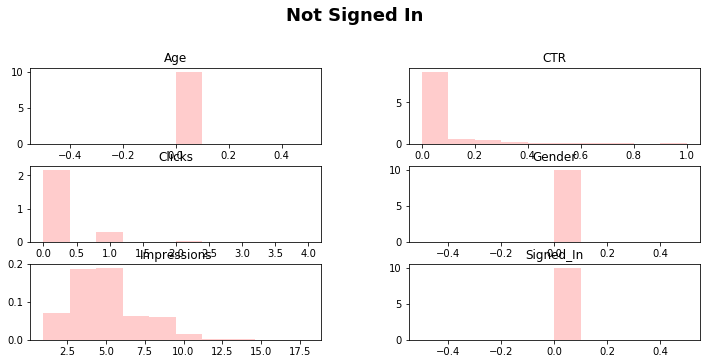

In [11]:
signed_in=data[data['Signed_In']==1 ]
not_signed_in=data[data['Signed_In']==0 ]

plot_hist(signed_in,'Signed In', 'g' )
plot_hist(not_signed_in,'Not Signed In', 'r' )

In [12]:
scs.ttest_ind(signed_in, not_signed_in, equal_var=False)

Ttest_indResult(statistic=array([  1.45725924e+03,   5.92354001e+02,   1.44938435e+00,
        -6.17522648e+01,              inf,  -5.53761179e+01]), pvalue=array([ 0.       ,  0.       ,  0.1472315,  0.       ,  0.       ,  0.       ]))

In [30]:
def t_test(df1, df2, df1_name, df2_name):
    fig= plt.figure()
    df1_mean=df1['CTR'].mean()
    df2_mean=df2['CTR'].mean()
    
    print '%s Mean CTR %s' %(df1_name, df1_mean) 
    print '%s Mean CTR %s' %(df2_name, df2_mean) 
    print 'diff in mean: ', abs(df1_mean-df2_mean)
    p_val= scs.ttest_ind(df1['CTR'], df2['CTR'], equal_var=False)[1]
    print 'p val is: ', p_val 
    
    df1['CTR'].hist(normed=True, label=df1_name,color='g', alpha =0.3)
    df2['CTR'].hist(normed=True, label=df2_name ,color='r', alpha =0.3)
    plt.axvline(df1_mean, color='r', alpha=0.6, lw=2)
    plt.axvline(df2_mean, color='g', alpha=0.6, lw=2)
    
    plt.ylabel('Prob Density')
    plt.xlabel('CTR')
    plt.legend()
    plt.grid('off')
 
    

Signed In Mean CTR 0.0142536352321
Not Signed In Mean CTR 0.0283549070617
diff in mean:  0.0141012718295
p val is:  0.0


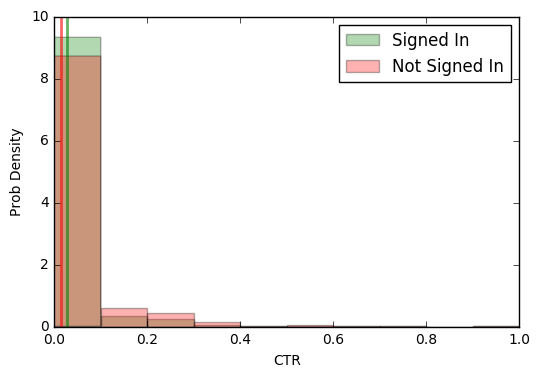

In [31]:
t_test(signed_in, not_signed_in, 'Signed In', 'Not Signed In')

In [32]:
def t_test_2(df1, df2, df1_name, df2_name):
    fig= plt.figure()
    df1_mean=df1['CTR'].mean()
    df2_mean=df2['CTR'].mean()
    
    print '%s Mean CTR %s' %(df1_name, df1_mean) 
    print '%s Mean CTR %s' %(df2_name, df2_mean) 
    print 'diff in mean: ', abs(df1_mean-df2_mean)
    p_val= scs.ttest_ind(df1['CTR'], df2['CTR'], equal_var=False)[1]
    print 'p val is: ', p_val 
    
    df1['CTR'].hist(label=df1_name,color='g', alpha =0.3)
    df2['CTR'].hist(label=df2_name ,color='r', alpha =0.3)
    #plt.axvline(df1_mean, color='r', alpha=0.6, lw=2)
    #plt.axvline(df2_mean, color='g', alpha=0.6, lw=2)
    
    plt.ylabel('Prob Density')
    plt.xlabel('CTR')
    plt.legend()
    plt.grid('off')


Signed In Mean CTR 0.0142536352321
Not Signed In Mean CTR 0.0283549070617
diff in mean:  0.0141012718295
p val is:  0.0


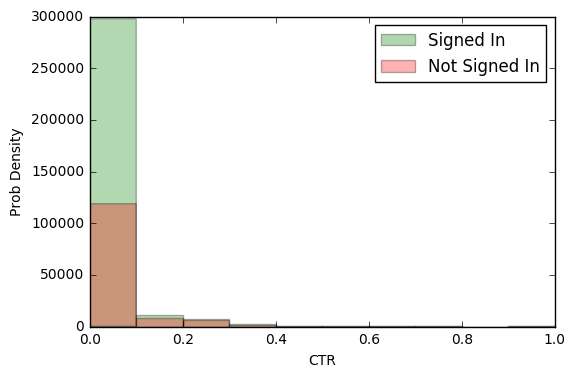

In [33]:
t_test_2(signed_in, not_signed_in, 'Signed In', 'Not Signed In')

In [60]:
def t_test_3(df1, df2, df1_name, df2_name):
    
    fig= plt.figure()
    df1_mean=df1['CTR'].mean()
    df2_mean=df2['CTR'].mean()
    _, ax=plt.subplots(2, figsize=(15,2) )
    
    
    print '%s Mean CTR %s' %(df1_name, df1_mean) 
    print '%s Mean CTR %s' %(df2_name, df2_mean) 
    print 'diff in mean: ', abs(df1_mean-df2_mean)
    p_val= scs.ttest_ind(df1['CTR'], df2['CTR'], equal_var=False)[1]
    print 'p val is: ', p_val 
    
    ax[0]= df1['CTR'].hist(normed=True, label=df1_name,color='g', alpha =0.3)
    ax[1]=df2['CTR'].hist(normed=True, label=df2_name ,color='r', alpha =0.3)
    #plt.axvline(df1_mean, color='r', alpha=0.6, lw=2)
    #plt.axvline(df2_mean, color='g', alpha=0.6, lw=2)
    
    
    
    ax[0].legend()
    ax[0].grid('off')
    
    
    ax[1].legend()
    ax[1].grid('off')
    


Signed In Mean CTR 0.0142536352321
Not Signed In Mean CTR 0.0283549070617
diff in mean:  0.0141012718295
p val is:  0.0


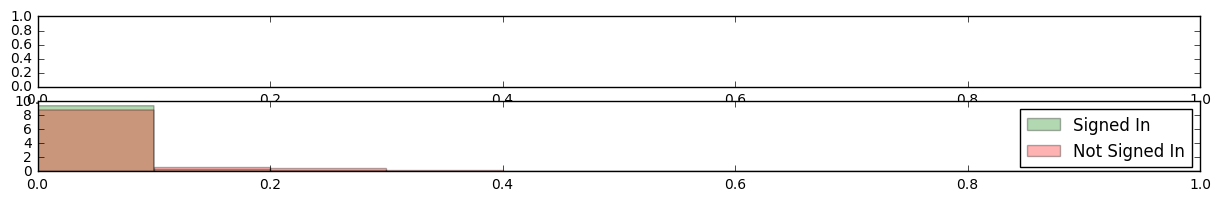

In [61]:
t_test_3(signed_in, not_signed_in, 'Signed In', 'Not Signed In')

M Mean CTR 0.0139185242976
F Mean CTR 0.0146220121839
diff in mean:  0.000703487886268
p val is:  0.00100285273131


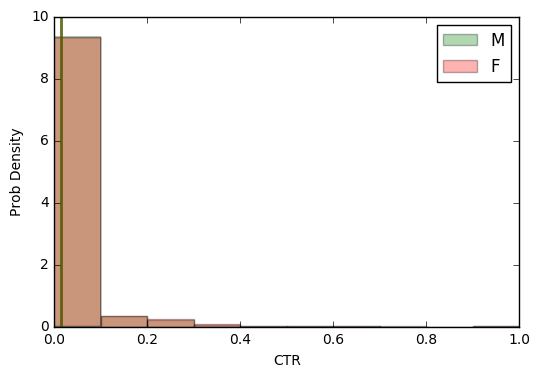

In [59]:
male = signed_in[signed_in['Gender'] == 1]
female = signed_in[signed_in['Gender'] == 0]
t_test(male, female, 'M', 'F')

In [18]:
import pandas as pd
import numpy as np

df2 = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
df2.head(2)

,a,b,c,d
0,0.047285,0.882619,0.268768,0.644485
1,0.277590,0.837058,0.972419,0.864559


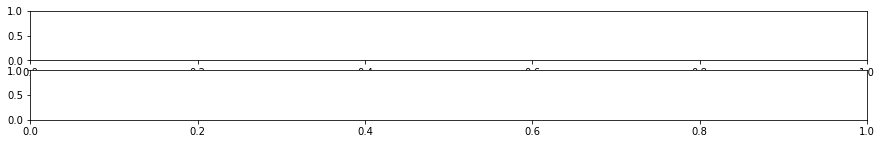

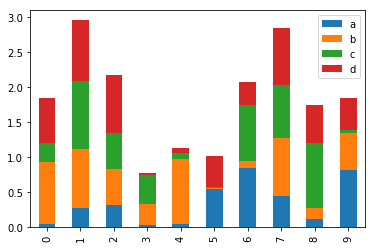

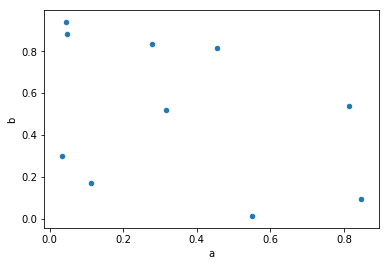

In [34]:
fig=plt.figure()

_, ax=plt.subplots(2,1, figsize=(15,2))

ax[0]=df2.plot.bar(stacked=True) 

ax[1]=df2.plot('a', 'b', kind='scatter')

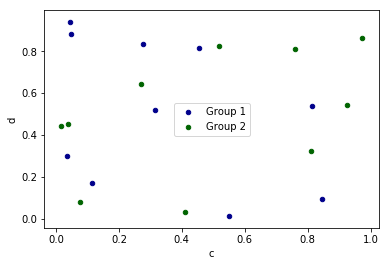

In [35]:
ax = df2.plot.scatter(x='a', y='b', color='DarkBlue', label='Group 1');

df2.plot.scatter(x='c', y='d', color='DarkGreen', label='Group 2', ax=ax) 

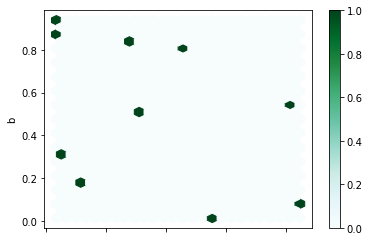

In [36]:
 df2.plot.hexbin(x='a', y='b', gridsize=25)

TypeError: 'Figure' object has no attribute '__getitem__'

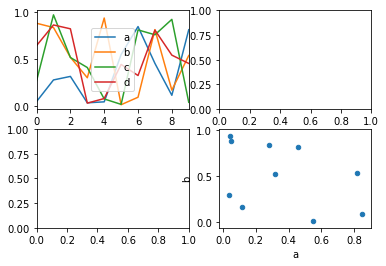

In [37]:
#df2.plot.kde()
fig, ax = plt.subplots(2, 2) 
df2.plot(ax=ax[0,0])
df2.plot.scatter(x='a', y='b', ax=ax[1,1])
fig[0,0]

In [38]:
signed_in['age_groups'] = pd.cut(signed_in['Age'], [7, 18, 24, 34, 44, 54, 64, 1000])

/Users/koyuki.nakamori/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [44]:
signed_in['age_groups'].head(3)

0      (34, 44]
1    (64, 1000]
2      (24, 34]
Name: age_groups, dtype: category
Categories (7, interval[int64]): [(7, 18] < (18, 24] < (24, 34] < (34, 44] < (44, 54] < (54, 64] < (64, 1000]]

In [40]:
signed_in.head(2)

,Age,Gender,Impressions,Clicks,Signed_In,CTR,age_groups
0,36,0,3,0,1,0.0,"(34, 44]"
1,73,1,3,0,1,0.0,"(64, 1000]"


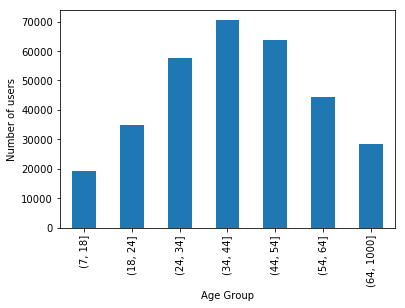

In [41]:
signed_in['age_groups'].value_counts().sort_index().plot(kind='bar', grid=False)

plt.xlabel('Age Group')
plt.ylabel('Number of users')

In [45]:
results = pd.DataFrame()

In [47]:
combos = combinations(pd.unique(signed_in['age_groups']), 2)

In [48]:
for age1, age2 in combos:
    ctr1 = signed_in[signed_in['age_groups'] == age1]['CTR']
    ctr2 = signed_in[signed_in['age_groups'] == age2]['CTR']
    p_val = scs.ttest_ind(ctr1, ctr2, equal_var=False)[1]
    ctr1_mean = ctr1.mean()
    ctr2_mean = ctr2.mean()
    diff = abs(ctr1_mean - ctr2_mean)
    results = results.append(dict(one=age1, two=age2,
                                    mean1=ctr1_mean, mean2=ctr2_mean,
                                    diff=diff, p=p_val), ignore_index=True)
#results = results[['one', 'two', 'mean1', 'mean2', 'diff', 'p']]

In [53]:
results=results[['one', 'two', 'mean1', 'mean2', 'diff', 'p']] 

In [55]:
results[results['p'] > alpha].sort_values('diff', ascending=True)

,one,two,mean1,mean2,diff,p
1,"(34, 44]","(24, 34]",0.010286,0.010146,0.000140,0.624662
13,"(24, 34]","(44, 54]",0.010146,0.009958,0.000189,0.514689
19,"(44, 54]","(18, 24]",0.009958,0.009720,0.000237,0.477902
2,"(34, 44]","(44, 54]",0.010286,0.009958,0.000329,0.233928
15,"(24, 34]","(18, 24]",0.010146,0.009720,0.000426,0.213658
4,"(34, 44]","(18, 24]",0.010286,0.009720,0.000566,0.087470


In [56]:
data = pd.read_csv('data/experiment.csv')

In [57]:
print 'ab column counts:'
print data['ab'].value_counts()
print 'landing_page column counts:'
print data['landing_page'].value_counts()


ab column counts:
treatment    100333
control       90815
Name: ab, dtype: int64
landing_page column counts:
old_page    95574
new_page    95574
Name: landing_page, dtype: int64


In [59]:
def find_mismatch(ab_cell, landing_page_cell):
        if ab_cell == 'treatment' and landing_page_cell == 'new_page':
            return 0
        elif ab_cell == 'control' and landing_page_cell == 'old_page':
            return 0
        else:
            return 1

In [60]:
func = lambda row: find_mismatch(row['ab'], row['landing_page'])

In [61]:
data['mismatch'] = data.apply(func, axis=1)

In [62]:
data = data[data['mismatch'] == 0]

In [64]:
import z_test.z_test as z_test

In [65]:
old = data[data['landing_page'] == 'old_page']
new = data[data['landing_page'] == 'new_page']
old_nrow = old.shape[0] * 1.
new_nrow = new.shape[0] * 1.
old_convert = old[old['converted'] == 1].shape[0]
new_convert = new[new['converted'] == 1].shape[0]
old_conversion = old_convert / old_nrow
new_conversion = new_convert / new_nrow

In [83]:
z_test(old_conversion, new_conversion, old_nrow, new_nrow, effect_size=0.001, two_tailed=False, alpha=.05)

-0.691727618087 0.755445800229 False


(-0.69172761808650018, 0.75544580022881469, False)

In [88]:
def plot_pval(data):
    pval_lst = []
    datetime = data.ts.astype('datetime64[s]')
    hour = datetime.apply(lambda x: x.hour)
    data['hour'] = hour
      
    # Run the test as the data accumulates hourly
    for hr in hour.unique():
        hr_data = data[data['hour'] <= hr]
          
        # data for old landing page
        old = hr_data[hr_data['landing_page'] == 'old_page']['converted']
        old_nrow = old.shape[0]
        old_conversion = old.mean()
          
        # data for new landing page
        new = hr_data[hr_data['landing_page'] == 'new_page']['converted']
        new_nrow = new.shape[0]
        new_conversion = new.mean()
          
        # Run the z-test
        p_val = z_test(old_conversion, new_conversion,old_nrow, new_nrow, effect_size=0.001, two_tailed=True, alpha=.05)
        pval_lst.append(p_val[1])
        
    # Make the plot
    plt.plot(pval_lst, marker='o')
    plt.ylabel('p-value', fontweight='bold', fontsize=14)
    plt.xlabel('Hour in the day', fontweight='bold', fontsize=14)
    plt.axhline(0.05, linestyle='--', color='r') 

In [91]:
data.head(2)

,user_id,ts,ab,landing_page,converted,mismatch,hour
0,4040615247,1.356998e+09,treatment,new_page,0,0,0
1,4365389205,1.356998e+09,treatment,new_page,0,0,0


In [94]:
datetime=data.ts.astype('datetime64[s]')
hour=datetime.apply(lambda x: x.hour)
data['hour']=hour

In [68]:
  def read_country_and_merge(filename):
        country = pd.read_csv(filename)
        merged_df = pd.merge(data, country, left_on='user_id', right_on='user_id', how='left')
        merged_df['country'] = merged_df['country'].map(str)
        return merged_df

In [69]:
merged_df = read_country_and_merge('data/country.csv')

In [70]:
merged_df.head(2)

,user_id,ts,ab,landing_page,converted,mismatch,country
0,4040615247,1.356998e+09,treatment,new_page,0,0,US
1,4365389205,1.356998e+09,treatment,new_page,0,0,US


In [71]:
datetime = data.ts.astype('datetime64[s]')

In [84]:
def run_country_test(df):
    results = {}
    for country in df['country'].unique():
        country_df = df[df['country'] == country]
        p_val, old_conversion, new_conversion = z_test(country_df)
        results[country] = [p_val, new_conversion - old_conversion]
        
    for country, lst in results.iteritems():
        p_val, conversion_diff = lst
        print '%s | conversion increase: %s | p_val: %s' % (country, conversion_diff, p_val)

In [80]:
from __future__ import division
from numpy import sqrt
import scipy.stats as scs 
def z_test(ctr_old, ctr_new, nobs_old, nobs_new, effect_size=0., two_tailed=True, alpha=.05):
    conversion = (ctr_old * nobs_old + ctr_new * nobs_new) /(nobs_old + nobs_new)
    se = sqrt(conversion * (1 - conversion) * (1 / nobs_old + 1 / nobs_new))
    z_score = (ctr_new - ctr_old - effect_size) / se
    
    if two_tailed: 
        p_val= (1-scs.norm.cdf(abs(z_score)))*2 
    else: 
        p_val=1-scs.norm.cdf(z_score)
    reject_null= p_val < alpha 
    print z_score, p_val, reject_null
    return z_score, p_val, reject_null   


In [81]:
    old_p = 100. / 1000
    new_p = 105. / 1000
    old_row = 1000.
    new_row = 1000.
    

In [82]:
 z_test(new_p, old_p, old_row, new_row, two_tailed=False)

-0.368617411572 0.6437935422 False


(-0.3686174115717622, 0.64379354220012275, False)